In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from latex_decompiler.utils import construct
from pixel_art.domain.stamp import digit_stamps
from pixel_art.domain.domain import domain_types

from pixel_art.analysis.main_experiment import data_spec

In [4]:
stamps = digit_stamps()

In [5]:
actual = construct(domain_types(), data_spec["domain_spec"])

In [6]:
for i in range(100):
    x, y, placed_stamps = actual.sample_with_metadata(np.random.RandomState(i), stamps)
    if len(y) == 6:
        break
else:
    raise "couldn't find"

In [7]:
y

['0', '7', '2', '6', '3', '4']

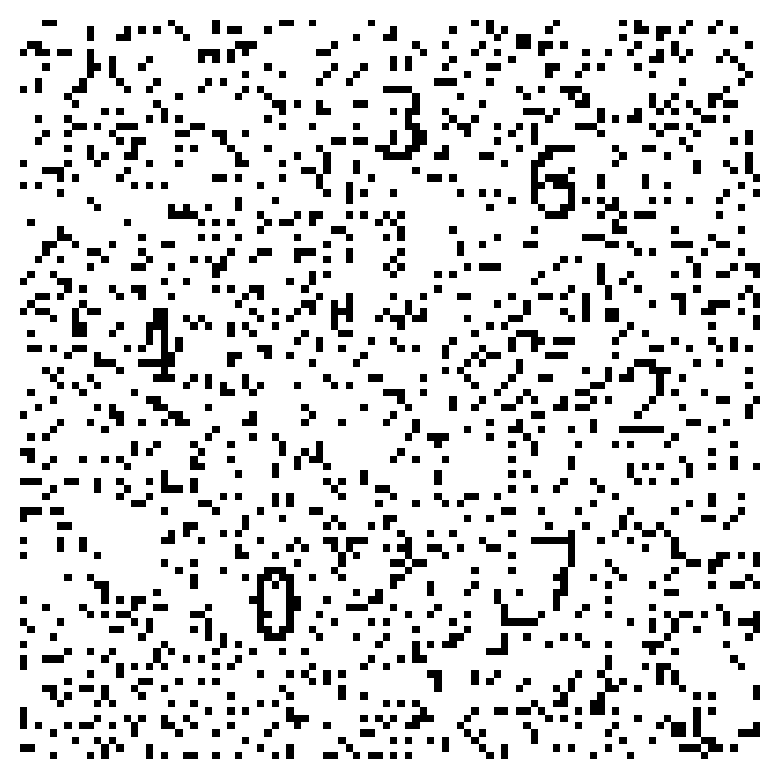

In [8]:
plt.figure(dpi=200)
plt.imshow(x, cmap="gray_r")
plt.axis("off")
plt.savefig("output/top-figure-1.png", bbox_inches="tight", pad_inches=0)

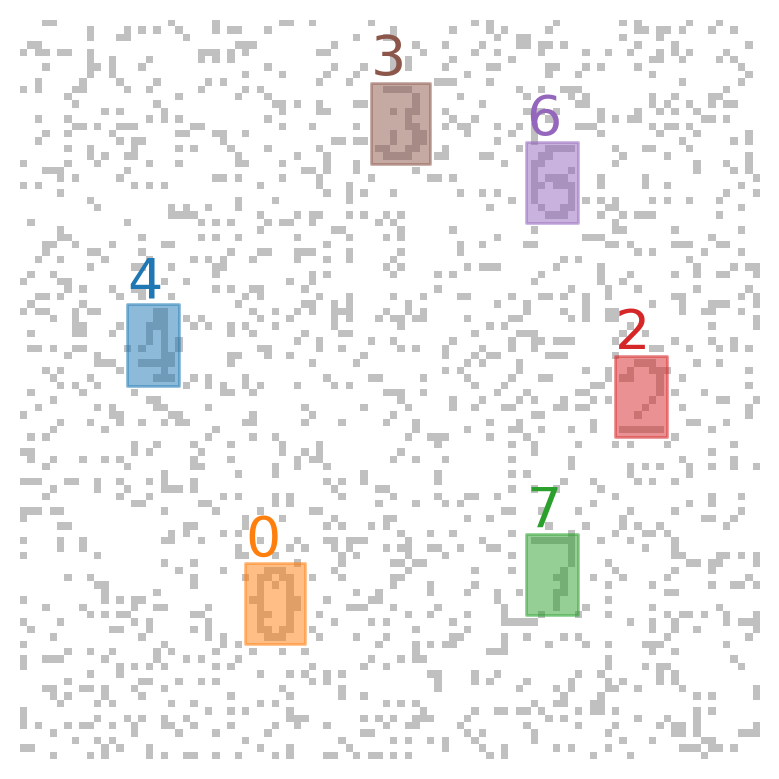

In [9]:
plt.figure(dpi=200)
plt.imshow(x, cmap="gray_r", alpha=0.25)
for color, stamp in zip(plt.rcParams['axes.prop_cycle'].by_key()['color'], placed_stamps["placed_stamps"]):
    yr, xr = stamp["slices"]
    plt.fill_between([xr.start, xr.stop - 1], [yr.start] * 2, [yr.stop - 1] * 2, alpha=0.5, color=color)
    plt.text(xr.start, yr.start - 1, s=stamp["symbol"], color=color, size=20)
plt.axis("off")
plt.savefig("output/top-figure-2.png", bbox_inches="tight", pad_inches=0)